In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from utils.config import cfg, cfg_from_file
cfg_from_file("config/kidney/emd_cens_kidney.yml")

In [3]:
from dataset_loader import load_data

In [4]:
data, dict_col = load_data(cfg)


Dataset kidney info:
Nb. col: 67
Nb unique t: 7299
Min t: 0.0
Max t: 21.356164383561644


In [11]:
import torch
import os
path = "/local_workspace/piepmike/Survival_Pytorch_EMD/results/No_Shuffling/LR0.001_L20.0001_PRIOR1.0/Models/model_epoch_bestsplit3.pth"
state_dict = torch.load(path, map_location=lambda storage, loc: storage)

In [23]:
from models import MLP
from utils.config import cfg, cfg_from_file
from trainer.emd_trainer import EMDTrainer

In [14]:
cfg.CUDA = False
trainer = EMDTrainer(0)
trainer.model.load_state_dict(state_dict)
trainer.model.eval();

{'CONFIG_NAME': 'emd_cens_kidney',
 'CUDA': False,
 'DATA': {'ADD_CENS': False,
          'DATASET': 'kidney',
          'DEATH_AT_CENSOR_TIME': False,
          'NO_CENSORED_DATA': False,
          'PATH': 'datasets/',
          'SPLITS': '[0, 1, 2, 3, 4]'},
 'EMD': {'PRIOR': [1.0]},
 'GPU_ID': '0',
 'TRAIN': {'BATCH_NORM': True,
           'BATCH_SIZE': 512,
           'DIV_TIME': 1,
           'DROP_HIDDEN': '[0.5, 0.5, 0.5]',
           'DROP_INPUT': 0.2,
           'L2_COEFF': ['1e-5', '1e-4'],
           'LAYER_SIZES': '[100, 100, 100]',
           'LOSS_TYPE': 'emd_loss',
           'LR': ['1e-4', '1e-3'],
           'MAX_EPOCH': 1000,
           'MODEL': 'emd',
           'PATIENCE': 20},
 'VERBOSE': False}

Dataset kidney info:
Nb. col: 67
Nb unique t: 7299
Min t: 0.0
Max t: 21.356164383561644


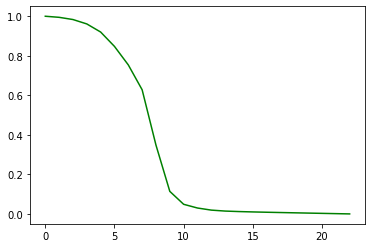

In [15]:
import numpy as np
idx = np.random.choice(len(data))
x = data[idx:idx+1]
cdfs = trainer.predict_batch(x)
plt.plot(1-cdfs[0], color='green')

In [19]:

batch = data[[ 18958,  49361,  53668,  58243,  61434,  66717,  79243,  82652,
             86714, 101727, 103369, 104267, 104351, 133756, 135167, 137244,
            144667, 145391, 158685, 158997, 164406, 165125],:]

cdfs = trainer.predict_batch(batch)
cdfs

array([[1.56660541e-03, 3.50843929e-02, 9.43403468e-02, 1.87940270e-01,
        3.22286308e-01, 4.77680504e-01, 6.31145477e-01, 7.78288782e-01,
        9.06524777e-01, 9.57044780e-01, 9.70829785e-01, 9.76428211e-01,
        9.79842126e-01, 9.82631803e-01, 9.84966993e-01, 9.87030864e-01,
        9.88955140e-01, 9.90824699e-01, 9.92668927e-01, 9.94503081e-01,
        9.96336639e-01, 9.98168468e-01, 9.99999940e-01],
       [1.25058810e-03, 8.86197239e-02, 2.18955979e-01, 3.80653679e-01,
        5.73634207e-01, 7.43537068e-01, 8.72361362e-01, 9.57380414e-01,
        9.92010117e-01, 9.96045411e-01, 9.96391594e-01, 9.96482372e-01,
        9.96548891e-01, 9.96750593e-01, 9.97043371e-01, 9.97379243e-01,
        9.97738898e-01, 9.98109400e-01, 9.98485029e-01, 9.98863459e-01,
        9.99242842e-01, 9.99621511e-01, 9.99999940e-01],
       [1.59523147e-03, 5.00526391e-02, 1.31027058e-01, 2.49469027e-01,
        4.09622550e-01, 5.79540014e-01, 7.33733475e-01, 8.65132451e-01,
        9.55591619e-01